In [1]:
import pandas as pd


In [2]:
dataset=pd.read_csv(r"C:\Users\wwrao\Documents\machine project without deployment\housing prediction\model.csv")

In [3]:
dataset.head(2)

,Unnamed: 0,description,property_type,id,postal_code,price,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,listing_year,construction_year
0,0,[ 0.75826776 3.213125 -4.9623823 -3.432942...,[ 0.94690067 1.3557965 -3.429536 -4.110108...,4388064.0,17.0,139000.0,1.0,1975.5,1.0,207.0,3.0,1.0,7.0,62.0,2018.0,2018.0
1,1,[ 0.95163393 1.9673971 -4.0726137 -2.553373...,[-1.1773891 -2.0983608 -6.210434 -2.006682...,4388200.0,74.0,209000.0,1.0,1980.0,1.0,148.0,5.0,1.0,6.0,136.0,2018.0,2018.0


In [4]:
dataset.shape


(49992, 16)

In [5]:
dataset=dataset.dropna()



In [6]:
data=dataset.drop(columns=["Unnamed: 0","property_type","description","id","listing_year"])

In [7]:
data.head()

,postal_code,price,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,construction_year
0,17.0,139000.0,1.0,1975.5,1.0,207.0,3.0,1.0,7.0,62.0,2018.0
1,74.0,209000.0,1.0,1980.0,1.0,148.0,5.0,1.0,6.0,136.0,2018.0
2,10.0,267500.0,0.0,2005.5,0.0,207.0,3.0,1.0,7.0,70.0,2018.0
3,56.0,349000.0,1.0,1973.0,1.0,244.0,5.0,1.0,7.0,144.0,2018.0
4,77.0,495000.0,1.0,1900.0,0.0,4500.0,8.0,1.0,7.0,323.0,2018.0


In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
d=ss.fit_transform(data)
data=pd.DataFrame(d,columns=data.columns)

dataset=data.dropna()

In [9]:
dataset.head()

,postal_code,price,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,construction_year
0,-1.170834,-0.900507,0.609214,0.036635,0.656425,-0.087914,-1.036045,-0.254684,-0.000554,-1.151205,-0.258518
1,1.157406,-0.534254,0.609214,0.153434,0.656425,-0.108226,0.225089,-0.254684,-0.928721,0.323758,-0.258518
2,-1.456758,-0.228171,-1.641460,0.815295,-1.523404,-0.087914,-1.036045,-0.254684,-0.000554,-0.991749,-0.258518
3,0.422172,0.198253,0.609214,-0.028254,0.656425,-0.075176,0.225089,-0.254684,-0.000554,0.483213,-0.258518
4,1.279945,0.962153,0.609214,-1.922993,-1.523404,1.390041,2.116791,-0.254684,-0.000554,4.051027,-0.258518


In [10]:
x=dataset.drop(columns=["price"])
y=dataset["price"]

In [11]:
x.head()

,postal_code,category,year_built,garden,plot_area,num_rooms,num_bathrooms,energy_label,surface_area,construction_year
0,-1.170834,0.609214,0.036635,0.656425,-0.087914,-1.036045,-0.254684,-0.000554,-1.151205,-0.258518
1,1.157406,0.609214,0.153434,0.656425,-0.108226,0.225089,-0.254684,-0.928721,0.323758,-0.258518
2,-1.456758,-1.641460,0.815295,-1.523404,-0.087914,-1.036045,-0.254684,-0.000554,-0.991749,-0.258518
3,0.422172,0.609214,-0.028254,0.656425,-0.075176,0.225089,-0.254684,-0.000554,0.483213,-0.258518
4,1.279945,0.609214,-1.922993,-1.523404,1.390041,2.116791,-0.254684,-0.000554,4.051027,-0.258518


In [12]:
x.isnull().sum()

postal_code          0
category             0
year_built           0
garden               0
plot_area            0
num_rooms            0
num_bathrooms        0
energy_label         0
surface_area         0
construction_year    0
dtype: int64

In [13]:
y.isnull().sum()

0

In [14]:
x.shape

(48596, 10)

In [15]:
y.shape

(48596,)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
import tensorflow as tf

In [18]:
from tensorflow import keras 

In [19]:
x_train.shape

(38876, 10)

In [20]:
x_train.shape[1]

10

In [21]:
model = keras.Sequential([
    
    keras.layers.Dense(10000, activation="relu",input_shape=(10,),kernel_regularizer=tf.keras.regularizers.l2(0.03)),  
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1000, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.03)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1,activation="linear",kernel_regularizer=tf.keras.regularizers.l2(0.03))  # Output layer (for regression)
])


C:\Users\wwrao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10000)               │         110,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │      10,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         100,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,212,121 (38.96 MB)

 Trainable params: 10,212,121 (38.96 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 

In [24]:
model.compile(optimizer=optimizer,loss="mae",metrics=["mae"])

In [25]:
call_back=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[call_back])

Epoch 1/50
 447/1215 ━━━━━━━━━━━━━━━━━━━━ 1:58 154ms/step - loss: 6.0598 - mae: 0.4975 

In [43]:
train_mse=model.evaluate(x_train,y_train)
train_mse

1215/1215 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2916 - mae: 0.2916


[0.29041552543640137, 0.29041552543640137]

In [44]:
test_mse=model.evaluate(x_test,y_test)

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3208 - mae: 0.3208


In [29]:
history.history

{'loss': [0.35751691460609436,
  0.3357604742050171,
  0.3292367160320282,
  0.32520443201065063,
  0.3200916349887848,
  0.3189746141433716,
  0.3155733048915863,
  0.3128940165042877,
  0.3104221522808075,
  0.30806323885917664,
  0.3049296438694,
  0.3016565144062042,
  0.29995280504226685,
  0.29892078042030334,
  0.2964015603065491,
  0.29468852281570435,
  0.29376232624053955,
  0.29210710525512695,
  0.2901875078678131,
  0.29032114148139954,
  0.28690263628959656,
  0.28662657737731934,
  0.2846047282218933],
 'mae': [0.35751691460609436,
  0.3357604742050171,
  0.3292367160320282,
  0.32520443201065063,
  0.3200916349887848,
  0.3189746141433716,
  0.3155733048915863,
  0.3128940165042877,
  0.3104221522808075,
  0.30806323885917664,
  0.3049296438694,
  0.3016565144062042,
  0.29995280504226685,
  0.29892078042030334,
  0.2964015603065491,
  0.29468852281570435,
  0.29376232624053955,
  0.29210710525512695,
  0.2901875078678131,
  0.29032114148139954,
  0.28690263628959656,
 

In [30]:
import matplotlib.pyplot as plt 

In [31]:
%matplotlib inline 

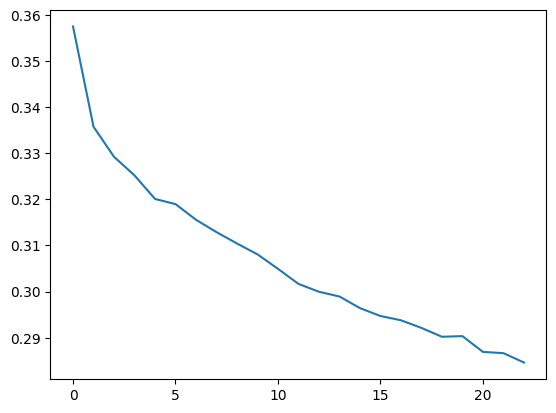

In [32]:
plt.plot(history.history['loss'],label="loss")


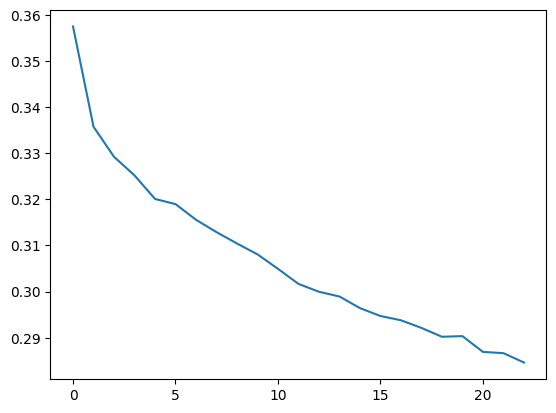

In [33]:
plt.plot(history.history['mae'],label="accuracy")

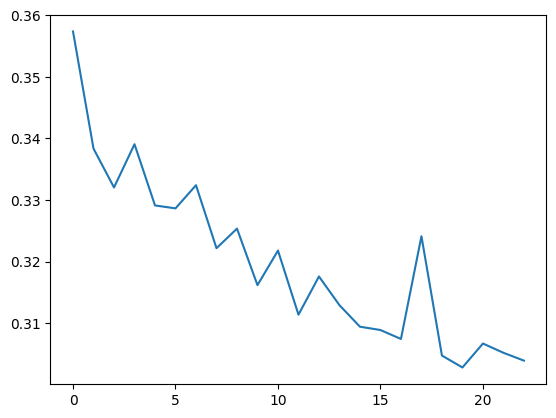

In [34]:
plt.plot(history.history['val_loss'],label="accuracy")

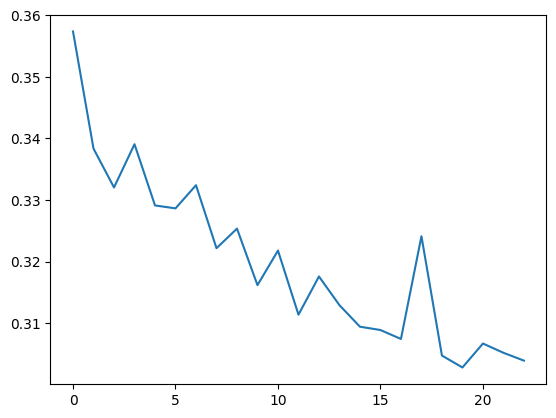

In [35]:
plt.plot(history.history['val_mae'],label="accuracy")